# Importing packages and libraries

In [298]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori, association_rules
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
import scipy.cluster.hierarchy as hc
from sklearn.preprocessing import normalize
from scipy.cluster.hierarchy import fcluster
from sklearn.cluster import KMeans as km
from sklearn.preprocessing import normalize
from yellowbrick.cluster import KElbowVisualizer

C:\Users\yetur\Anaconda3\lib\site-packages\seaborn\rcmod.py:82: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) >= "3.0":
C:\Users\yetur\Anaconda3\lib\site-packages\setuptools\_distutils\version.py:351: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


# Part I: Analyzing Transactions

# Importing Dataset to jupyter notebook

In [23]:
df=pd.read_csv(r"transactions.csv")
df.head()

,Transaction,Product
0,12359,Candy Bar
1,12362,Pain Reliever
2,12362,Pain Reliever
3,12365,Toothpaste
4,12371,Bow


<h><b>1. Read in the data and generate a file in which every row represents a transaction, with True identifying items
that were part of that transaction, and False identifying items that were not (as in the example from class).
    Name the file group04transactions01.csv, where xx is your group number.</b></h>

In [25]:
df=df.drop_duplicates()
df=pd.get_dummies(df, prefix='',prefix_sep='')
df=df.groupby(['Transaction']).sum().reset_index()
df.set_index('Transaction',inplace=True)
df = df.astype(bool)
df.to_csv('group04transaction01.csv')

,Bow,Candy Bar,Deodorant,Greeting Cards,Magazine,Markers,Pain Reliever,Pencils,Pens,Perfume,Photo Processing,Prescription Med,Shampoo,Soap,Toothbrush,Toothpaste,Wrapping Paper
Transaction,,,,,,,,,,,,,,,,,
12359,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
12362,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
12365,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
12371,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
12380,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1221845,False,False,False,True,True,False,False,False,True,False,True,False,False,False,False,True,False
1221854,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
1221857,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


<h><b>2. Identify the frequent itemsets using a minimum support threshold of 1%. How many itemsets are frequent?</b></h>

In [28]:
fi = apriori(df, min_support = 0.01, use_colnames = True)
print(len(fi))
fi

40


,support,itemsets
0,0.054645,(Bow)
1,0.171005,(Candy Bar)
2,0.146885,(Greeting Cards)
3,0.241305,(Magazine)
4,0.026700,(Pain Reliever)
5,0.134925,(Pencils)
6,0.143575,(Pens)
7,0.089960,(Perfume)
8,0.058480,(Photo Processing)
9,0.014505,(Prescription Med)


<h><b>3. Identify all association rules with a minimum confidence of 10%. How many rules are generated?</b></h>

In [42]:
rules = association_rules(fi, metric="confidence", min_threshold=0.1)
print(len(rules))
rules

50


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Bow),(Toothbrush),0.054645,0.067350,0.011340,0.207521,3.081236,0.007660,1.176877
1,(Toothbrush),(Bow),0.067350,0.054645,0.011340,0.168374,3.081236,0.007660,1.136755
2,(Candy Bar),(Greeting Cards),0.171005,0.146885,0.043660,0.255314,1.738191,0.018542,1.145604
3,(Greeting Cards),(Candy Bar),0.146885,0.171005,0.043660,0.297239,1.738191,0.018542,1.179626
4,(Candy Bar),(Magazine),0.171005,0.241305,0.040535,0.237040,0.982325,-0.000729,0.994410
5,(Magazine),(Candy Bar),0.241305,0.171005,0.040535,0.167982,0.982325,-0.000729,0.996367
6,(Candy Bar),(Pencils),0.171005,0.134925,0.033015,0.193065,1.430903,0.009942,1.072050
7,(Pencils),(Candy Bar),0.134925,0.171005,0.033015,0.244691,1.430903,0.009942,1.097558
8,(Candy Bar),(Toothpaste),0.171005,0.160425,0.039780,0.232625,1.450053,0.012347,1.094087
9,(Toothpaste),(Candy Bar),0.160425,0.171005,0.039780,0.247966,1.450053,0.012347,1.102338


<h><b>4. Which rules have the highest lift? Using the results from the previous questions, show exactly how this lift
value was calculated for one of the rules with highest lift.</b></h>

In [41]:
rules1 = rules.sort_values(['lift'], ascending =[False])
rules1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
26,(Perfume),(Toothbrush),0.089960,0.067350,0.021820,0.242552,3.601370,0.015761,1.231306
27,(Toothbrush),(Perfume),0.067350,0.089960,0.021820,0.323979,3.601370,0.015761,1.346172
1,(Toothbrush),(Bow),0.067350,0.054645,0.011340,0.168374,3.081236,0.007660,1.136755
0,(Bow),(Toothbrush),0.054645,0.067350,0.011340,0.207521,3.081236,0.007660,1.176877
28,"(Candy Bar, Magazine)",(Greeting Cards),0.040535,0.146885,0.016665,0.411126,2.798966,0.010711,1.448723
31,(Greeting Cards),"(Candy Bar, Magazine)",0.146885,0.040535,0.016665,0.113456,2.798966,0.010711,1.082253
43,"(Pencils, Toothpaste)",(Candy Bar),0.024560,0.171005,0.011390,0.463762,2.711980,0.007190,1.545947
30,"(Magazine, Greeting Cards)",(Candy Bar),0.036335,0.171005,0.016665,0.458649,2.682078,0.010452,1.531344
47,"(Magazine, Toothpaste)",(Greeting Cards),0.031665,0.146885,0.011945,0.377230,2.568202,0.007294,1.369873
40,"(Magazine, Toothpaste)",(Candy Bar),0.031665,0.171005,0.013720,0.433286,2.533762,0.008305,1.462810


<t>We have two similar results for lift in the values dataframe hence we consider the one with highest confidence.</t>

In [43]:
rules2 = rules.sort_values(['lift','confidence'], ascending =[False,False], ignore_index=True)
rules2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Perfume),(Toothbrush),0.089960,0.067350,0.021820,0.242552,3.601370,0.015761,1.231306
1,(Toothbrush),(Perfume),0.067350,0.089960,0.021820,0.323979,3.601370,0.015761,1.346172
2,(Bow),(Toothbrush),0.054645,0.067350,0.011340,0.207521,3.081236,0.007660,1.176877
3,(Toothbrush),(Bow),0.067350,0.054645,0.011340,0.168374,3.081236,0.007660,1.136755
4,"(Candy Bar, Magazine)",(Greeting Cards),0.040535,0.146885,0.016665,0.411126,2.798966,0.010711,1.448723
5,(Greeting Cards),"(Candy Bar, Magazine)",0.146885,0.040535,0.016665,0.113456,2.798966,0.010711,1.082253
6,"(Pencils, Toothpaste)",(Candy Bar),0.024560,0.171005,0.011390,0.463762,2.711980,0.007190,1.545947
7,"(Magazine, Greeting Cards)",(Candy Bar),0.036335,0.171005,0.016665,0.458649,2.682078,0.010452,1.531344
8,"(Magazine, Toothpaste)",(Greeting Cards),0.031665,0.146885,0.011945,0.377230,2.568202,0.007294,1.369873
9,"(Magazine, Toothpaste)",(Candy Bar),0.031665,0.171005,0.013720,0.433286,2.533762,0.008305,1.462810


In [44]:
lift_value=rules2.iloc[0,5]/rules2.iloc[0,3]
print(lift_value)

3.6013696427976076


<h><b>5. For the same rule, show how leverage and conviction were obtained.</b></h>

<t> There is a covariance of 0.015761 between antecedent and consequents </t>
    

In [45]:
covariance=rules2.iloc[0,4]-(rules2.iloc[0,3]*rules2.iloc[0,2])
print(covariance)

0.015761194


<t>Conviction can be explained as a rule that can go wrong 1.231306 times more often if co-occurence was completely random</t>

In [46]:
conviction=(1-rules2.iloc[0,3])/(1-rules2.iloc[0,5])
print(conviction)

1.23130604637511


<h><b>6. Interpret and discuss the 5 rules with
(a) the highest confdence,
(b) the highest lift,
(c) the highest leverage, and
(d) the highest conviction.
If there are more than five meeting the required criterion, pick any five. Are any of these surprising? Comment
on the extent of their redundancy and utility.</b></h>

In [326]:
rules3a1=rules.sort_values(['support'],ascending=[False])
rules3a1
rules3a1.head(5)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
2,(Candy Bar),(Greeting Cards),0.171005,0.146885,0.043660,0.255314,1.738191,0.018542,1.145604
3,(Greeting Cards),(Candy Bar),0.146885,0.171005,0.043660,0.297239,1.738191,0.018542,1.179626
4,(Candy Bar),(Magazine),0.171005,0.241305,0.040535,0.237040,0.982325,-0.000729,0.994410
5,(Magazine),(Candy Bar),0.241305,0.171005,0.040535,0.167982,0.982325,-0.000729,0.996367
9,(Toothpaste),(Candy Bar),0.160425,0.171005,0.039780,0.247966,1.450053,0.012347,1.102338


In [314]:
rules3a=rules.sort_values(['confidence'],ascending=[False])
rules3a
rules3a.head(5)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
43,"(Pencils, Toothpaste)",(Candy Bar),0.024560,0.171005,0.011390,0.463762,2.711980,0.007190,1.545947
30,"(Magazine, Greeting Cards)",(Candy Bar),0.036335,0.171005,0.016665,0.458649,2.682078,0.010452,1.531344
40,"(Magazine, Toothpaste)",(Candy Bar),0.031665,0.171005,0.013720,0.433286,2.533762,0.008305,1.462810
28,"(Candy Bar, Magazine)",(Greeting Cards),0.040535,0.146885,0.016665,0.411126,2.798966,0.010711,1.448723
34,"(Greeting Cards, Toothpaste)",(Candy Bar),0.032080,0.171005,0.013175,0.410692,2.401637,0.007689,1.406726


confidence and conviction gives the similar transactions though they are quite contrast to each other. Hence the minimum confidence threshold of 10% is equal to the maximum conviction threshold of 10%
leverage implies the sales of both anticidents and consequents together irrespective of their order in rule, considering the antecedents and consequencts are statistically dependant. From the results in (c) we can observe that the values of leverage are same for the records with similar antecedents and consequents but with a change in their order of transaction. Where as leverage can suffer from the rare item problem and hence we can see few differences in the rules in (b) and (c)
lift measures the redundancy of antecedents and consequents, considering them to be statistically independant. whereas, lift is susceptable to the noise. Therefore, we could observe small changes in the values of the lift for (b).

In [327]:
rules3b=rules.sort_values(['lift'], ascending=[False])
rules3b
rules3b.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
26,(Perfume),(Toothbrush),0.089960,0.067350,0.021820,0.242552,3.601370,0.015761,1.231306
27,(Toothbrush),(Perfume),0.067350,0.089960,0.021820,0.323979,3.601370,0.015761,1.346172
1,(Toothbrush),(Bow),0.067350,0.054645,0.011340,0.168374,3.081236,0.007660,1.136755
0,(Bow),(Toothbrush),0.054645,0.067350,0.011340,0.207521,3.081236,0.007660,1.176877
28,"(Candy Bar, Magazine)",(Greeting Cards),0.040535,0.146885,0.016665,0.411126,2.798966,0.010711,1.448723
31,(Greeting Cards),"(Candy Bar, Magazine)",0.146885,0.040535,0.016665,0.113456,2.798966,0.010711,1.082253
43,"(Pencils, Toothpaste)",(Candy Bar),0.024560,0.171005,0.011390,0.463762,2.711980,0.007190,1.545947
30,"(Magazine, Greeting Cards)",(Candy Bar),0.036335,0.171005,0.016665,0.458649,2.682078,0.010452,1.531344
47,"(Magazine, Toothpaste)",(Greeting Cards),0.031665,0.146885,0.011945,0.377230,2.568202,0.007294,1.369873
40,"(Magazine, Toothpaste)",(Candy Bar),0.031665,0.171005,0.013720,0.433286,2.533762,0.008305,1.462810


(Perfume)	(Toothbrush) - Redundant

In [316]:
rules3c=rules.sort_values(['leverage'], ascending=[False])
rules3c
rules3c.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
2,(Candy Bar),(Greeting Cards),0.171005,0.146885,0.04366,0.255314,1.738191,0.018542,1.145604
3,(Greeting Cards),(Candy Bar),0.146885,0.171005,0.04366,0.297239,1.738191,0.018542,1.179626
26,(Perfume),(Toothbrush),0.089960,0.067350,0.02182,0.242552,3.601370,0.015761,1.231306
27,(Toothbrush),(Perfume),0.067350,0.089960,0.02182,0.323979,3.601370,0.015761,1.346172
9,(Toothpaste),(Candy Bar),0.160425,0.171005,0.03978,0.247966,1.450053,0.012347,1.102338


In [317]:
rules3d=rules.sort_values(['conviction'], ascending=[False])
rules3d
rules3d.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
43,"(Pencils, Toothpaste)",(Candy Bar),0.024560,0.171005,0.011390,0.463762,2.711980,0.007190,1.545947
30,"(Magazine, Greeting Cards)",(Candy Bar),0.036335,0.171005,0.016665,0.458649,2.682078,0.010452,1.531344
40,"(Magazine, Toothpaste)",(Candy Bar),0.031665,0.171005,0.013720,0.433286,2.533762,0.008305,1.462810
28,"(Candy Bar, Magazine)",(Greeting Cards),0.040535,0.146885,0.016665,0.411126,2.798966,0.010711,1.448723
34,"(Greeting Cards, Toothpaste)",(Candy Bar),0.032080,0.171005,0.013175,0.410692,2.401637,0.007689,1.406726


<h><b>7. Do any of these metrics seem preferable to the others for this dataset? Discuss why or why not.</b></h>

(conviction <-> confidence) and lift

<h><b>8. If you were in charge of these departments, how would you use the results of this analysis to come up with a
strategic plan? Explain your reasoning. This question is open ended, and I am looking for innovative thinking.</b></h>

With 1% support threshold and 10% confidence threshold, we have 50 rules that can help us in analysing and setting up the strategic plan. In this analysis metrics such as support, confidence, lift, leverage and conviction are used to formulate the plan. 

1) considering the highest support from minimum confidence threshold, which can show the most frequent item in the rule, we have 
(Candy Bar) -> (Greeting Cards)
(Greeting Cards) -> (Candy Bar)	
(Candy Bar) -> (Magazine)	
(Magazine) -> (Candy Bar)		
(Toothpaste) -> (Candy Bar)	

2) From the highest confidence we get the probability of seeing the items in consequent under the condition that the rule also contain the anticident. Hence, we have closed frequent item list among the frequent item list.
(Pencils, Toothpaste) -> (Candy Bar)
(Magazine, Greeting Cards) -> (Candy Bar)
(Magazine, Toothpaste) -> (Candy Bar)	
(Candy Bar, Magazine) -> (Greeting Cards)	
(Greeting Cards, Toothpaste) -> (Candy Bar)	

3) Finally, maximum value of lift is used to get subset of rules to make the business decision. 
(Perfume) -> (Toothbrush)
(Toothbrush) -> (Perfume)	
(Toothbrush) -> (Bow)	
(Bow) -> (Toothbrush)	
(Candy Bar, Magazine) -> (Greeting Cards)
(Greeting Cards) -> (Candy Bar, Magazine)
(Pencils, Toothpaste) -> (Candy Bar)
(Magazine, Greeting Cards) -> (Candy Bar)	
(Magazine, Toothpaste) -> (Greeting Cards)	
(Magazine, Toothpaste)- > (Candy Bar)	

Therefore, considering the rules that follow 1C2C3:
The rules that can set up a strategic plan are:
(Candy Bar, Magazine) -> (Greeting Cards)
(Greeting Cards) -> (Candy Bar, Magazine)
(Pencils, Toothpaste) -> (Candy Bar)
(Magazine, Greeting Cards) -> (Candy Bar)
(Magazine, Toothpaste)- > (Candy Bar)



# Part II: Clustering Customers

# Importing Dataset to jupyter notebook

In [273]:
df1=pd.read_csv(r'bankcustomers.csv')
df1

,Unnamed: 0,id,age,sex,region,income,married,children,car,savings,checking,mortgage,pep
0,0,ID12101,48,1,1,17546.00,0,1,0,0,0,0,1
1,1,ID12102,40,0,2,30085.10,1,3,1,0,1,1,0
2,2,ID12103,51,1,1,16575.40,1,0,1,1,1,0,0
3,3,ID12104,23,1,2,20375.40,1,3,0,0,1,0,0
4,4,ID12105,57,1,3,50576.30,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,595,ID12696,61,1,1,47025.00,0,2,1,1,1,1,0
596,596,ID12697,30,1,1,9672.25,1,0,1,1,1,0,0
597,597,ID12698,31,1,2,15976.30,1,0,1,1,0,0,1
598,598,ID12699,29,0,1,14711.80,1,0,0,1,0,1,0


<h><b>1. Notice that region is categorical; we need to do what is referred to as \one-hot encoding" { convert it into
separate (binary) variables, one for each possible value of region. So you will need to create 4 new variables,
corresponding to inner city, town, rural, and suburban (a 1 in a column would represent being from the
associated region). You can do this either explicitly by writing your own code, or by using the OneHotEncoder
option available in sklearn (preprocessing). Read in the data, create the four new columns and drop region.</b></h>

In [245]:
# df1_temp=pd.get_dummies(df1['region'], prefix='',prefix_sep='')
# df1_temp.head()

In [274]:
ohe=OneHotEncoder()
n_arr=ohe.fit_transform(df1.region.values.reshape(-1,1)).toarray()
df1_region=pd.DataFrame(n_arr,columns=['inner city', 'town', 'rural', 'suburban'])
df1=pd.concat([df1,df1_region], axis=1).drop(['region'], axis=1)
# df1=pd.concat([df1[:,0:3],df1_region,df1[:,5:],axis=1])
df1.head()

,Unnamed: 0,id,age,sex,income,married,children,car,savings,checking,mortgage,pep,inner city,town,rural,suburban
0,0,ID12101,48,1,17546.0,0,1,0,0,0,0,1,1.0,0.0,0.0,0.0
1,1,ID12102,40,0,30085.1,1,3,1,0,1,1,0,0.0,1.0,0.0,0.0
2,2,ID12103,51,1,16575.4,1,0,1,1,1,0,0,1.0,0.0,0.0,0.0
3,3,ID12104,23,1,20375.4,1,3,0,0,1,0,0,0.0,1.0,0.0,0.0
4,4,ID12105,57,1,50576.3,1,0,0,1,0,0,0,0.0,0.0,1.0,0.0


In [275]:
df1.isna().sum()

Unnamed: 0    0
id            0
age           0
sex           0
income        0
married       0
children      0
car           0
savings       0
checking      0
mortgage      0
pep           0
inner city    0
town          0
rural         0
suburban      0
dtype: int64

<h><b>2. Apply hierarchical clustering (with Euclidian distance as the measure of distance) to the dataset using (i)
centroid linkage, (ii) single linkage, (iii) complete linkage, (iv) average linkage, and (v) Ward linkage. For
each of these, comment on whether you see any clear clusters, and how many clusters you would recommend
(and why). Across all the linkage approaches tried, which one has worked best in this example (provide your
reasoning)? What are some distinguishing characteristics of each cluster?</b></h>

In [276]:
df_hc=df1.copy()
df_hc=df_hc.drop('Unnamed: 0', axis=1)
df_hc=df_hc.drop('id', axis=1)
df_hc.head()

,age,sex,income,married,children,car,savings,checking,mortgage,pep,inner city,town,rural,suburban
0,48,1,17546.0,0,1,0,0,0,0,1,1.0,0.0,0.0,0.0
1,40,0,30085.1,1,3,1,0,1,1,0,0.0,1.0,0.0,0.0
2,51,1,16575.4,1,0,1,1,1,0,0,1.0,0.0,0.0,0.0
3,23,1,20375.4,1,3,0,0,1,0,0,0.0,1.0,0.0,0.0
4,57,1,50576.3,1,0,0,1,0,0,0,0.0,0.0,1.0,0.0


In [281]:
# nbc_arr=df_hc[['age','income','children']].values
# nbc_nr=normalize(nbc_arr)
# nbc_df=pd.DataFrame(nbc_nr, columns=['age_norm','income_norm','children_norm'])
# nbc = pd.concat([df_hc,nbc_df], axis=1).drop(['age','income','children'], axis=1)
# nbc

nbc = normalize(df_hc)
nbc = pd.DataFrame(nbc, columns=df_hc.columns)
nbc

,age,sex,income,married,children,car,savings,checking,mortgage,pep,inner city,town,rural,suburban
0,0.002736,0.000057,0.999996,0.000000,0.000057,0.000000,0.000000,0.000000,0.000000,0.000057,0.000057,0.000000,0.00000,0.0
1,0.001330,0.000000,0.999999,0.000033,0.000100,0.000033,0.000000,0.000033,0.000033,0.000000,0.000000,0.000033,0.00000,0.0
2,0.003077,0.000060,0.999995,0.000060,0.000000,0.000060,0.000060,0.000060,0.000000,0.000000,0.000060,0.000000,0.00000,0.0
3,0.001129,0.000049,0.999999,0.000049,0.000147,0.000000,0.000000,0.000049,0.000000,0.000000,0.000000,0.000049,0.00000,0.0
4,0.001127,0.000020,0.999999,0.000020,0.000000,0.000000,0.000020,0.000000,0.000000,0.000000,0.000000,0.000000,0.00002,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,0.001297,0.000021,0.999999,0.000000,0.000043,0.000021,0.000021,0.000021,0.000021,0.000000,0.000021,0.000000,0.00000,0.0
596,0.003102,0.000103,0.999995,0.000103,0.000000,0.000103,0.000103,0.000103,0.000000,0.000000,0.000103,0.000000,0.00000,0.0
597,0.001940,0.000063,0.999998,0.000063,0.000000,0.000063,0.000063,0.000000,0.000000,0.000063,0.000000,0.000063,0.00000,0.0
598,0.001971,0.000000,0.999998,0.000068,0.000000,0.000000,0.000068,0.000000,0.000068,0.000000,0.000068,0.000000,0.00000,0.0


In [282]:
#centroid linkage
# clstr1_df=nbc.copy()
# len(clstr1)
clstr1 = hc.linkage(nbc, method='centroid', metric="euclidean")
# clstr1_df['CLUSTER'] = clstr1.tolist()
# clstr1_df = clstr1.groupby('CLUSTER', as_index=False).mean()
# clstr1_df

In [283]:
clstr1[0]

array([1.15000000e+02, 1.27000000e+02, 6.50256463e-06, 2.00000000e+00])

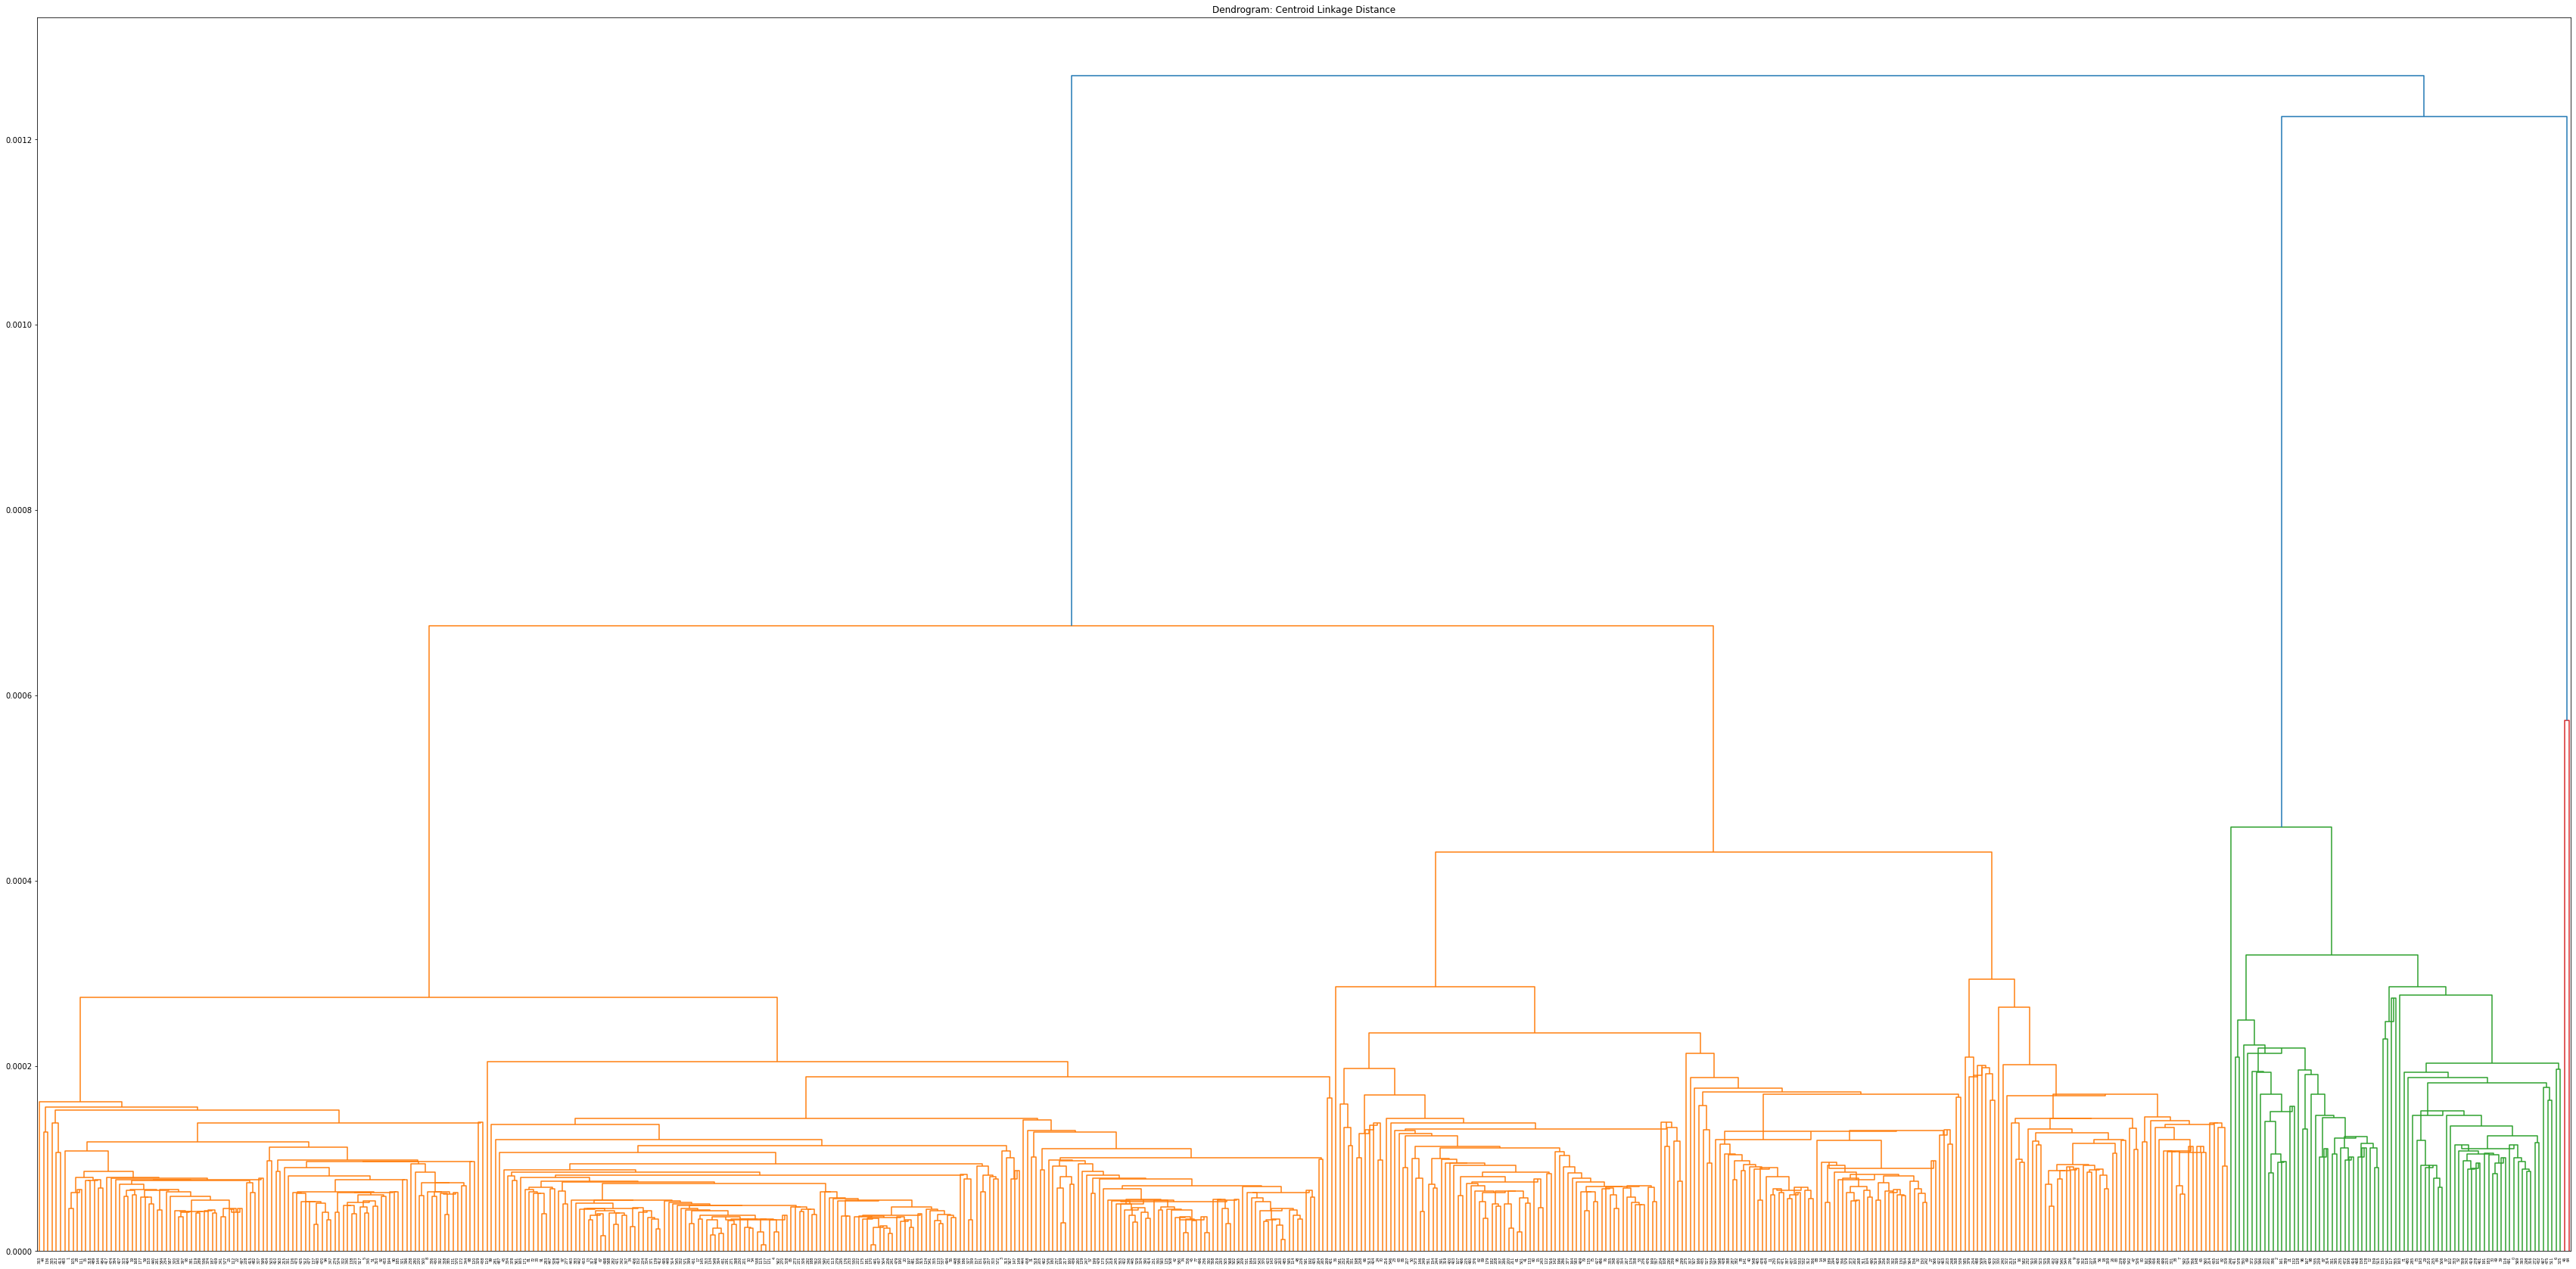

In [284]:
plt.figure(figsize=(60, 30))  
plt.title("Dendrogram: Centroid Linkage Distance")
dgnbb1 = hc.dendrogram(clstr1)
plt.show()

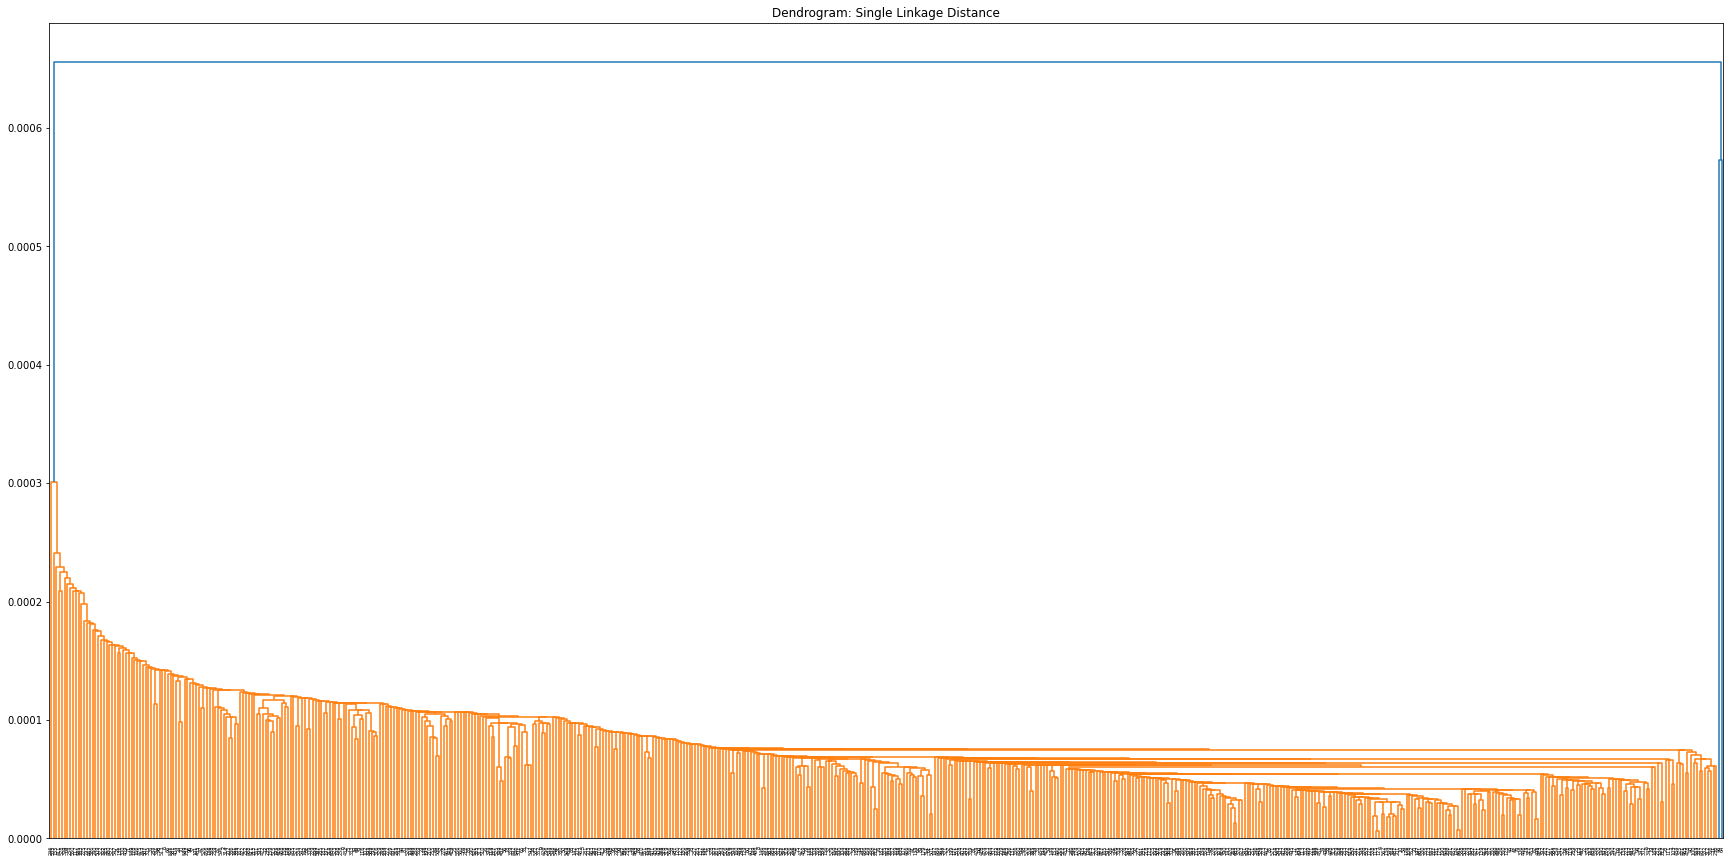

In [261]:
#single linkage
clstr2 = hc.linkage(nbc, method='single', metric="euclidean")
plt.figure(figsize=(30, 15))  
plt.title("Dendrogram: Single Linkage Distance")
dgnbb2 = hc.dendrogram(clstr2)

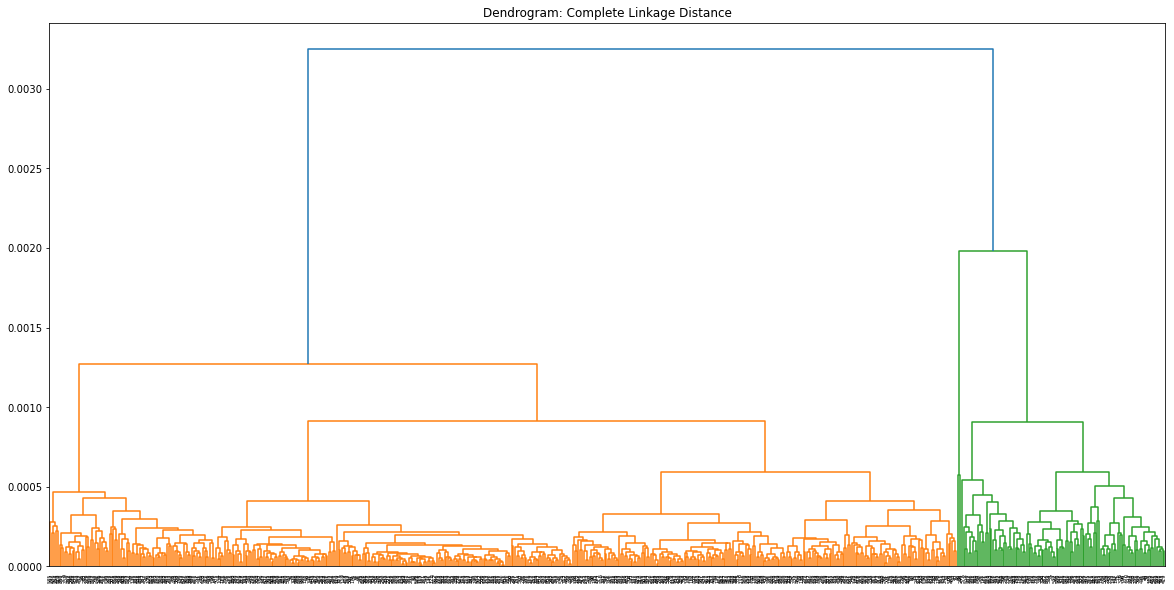

In [262]:
#complete linkage
clstr3 = hc.linkage(nbc, method='complete', metric="euclidean")
plt.figure(figsize=(20, 10))  
plt.title("Dendrogram: Complete Linkage Distance")
dgnbb3 = hc.dendrogram(clstr3)

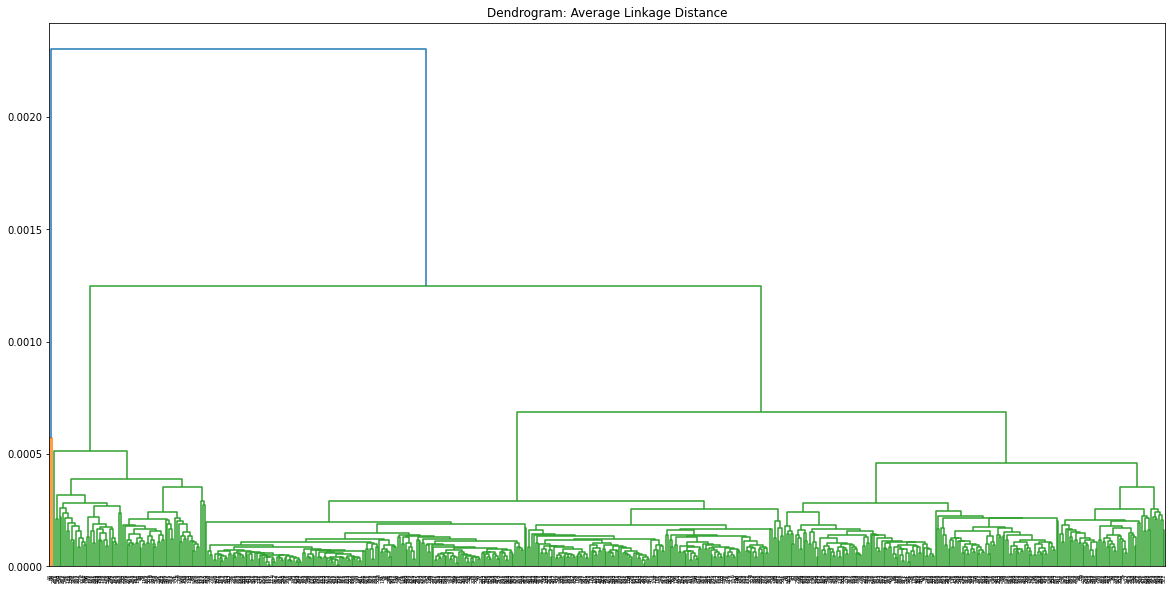

In [263]:
#average linkage
clstr4 = hc.linkage(nbc, method='average', metric="euclidean")
plt.figure(figsize=(20, 10))  
plt.title("Dendrogram: Average Linkage Distance")
dgnbb4 = hc.dendrogram(clstr4)

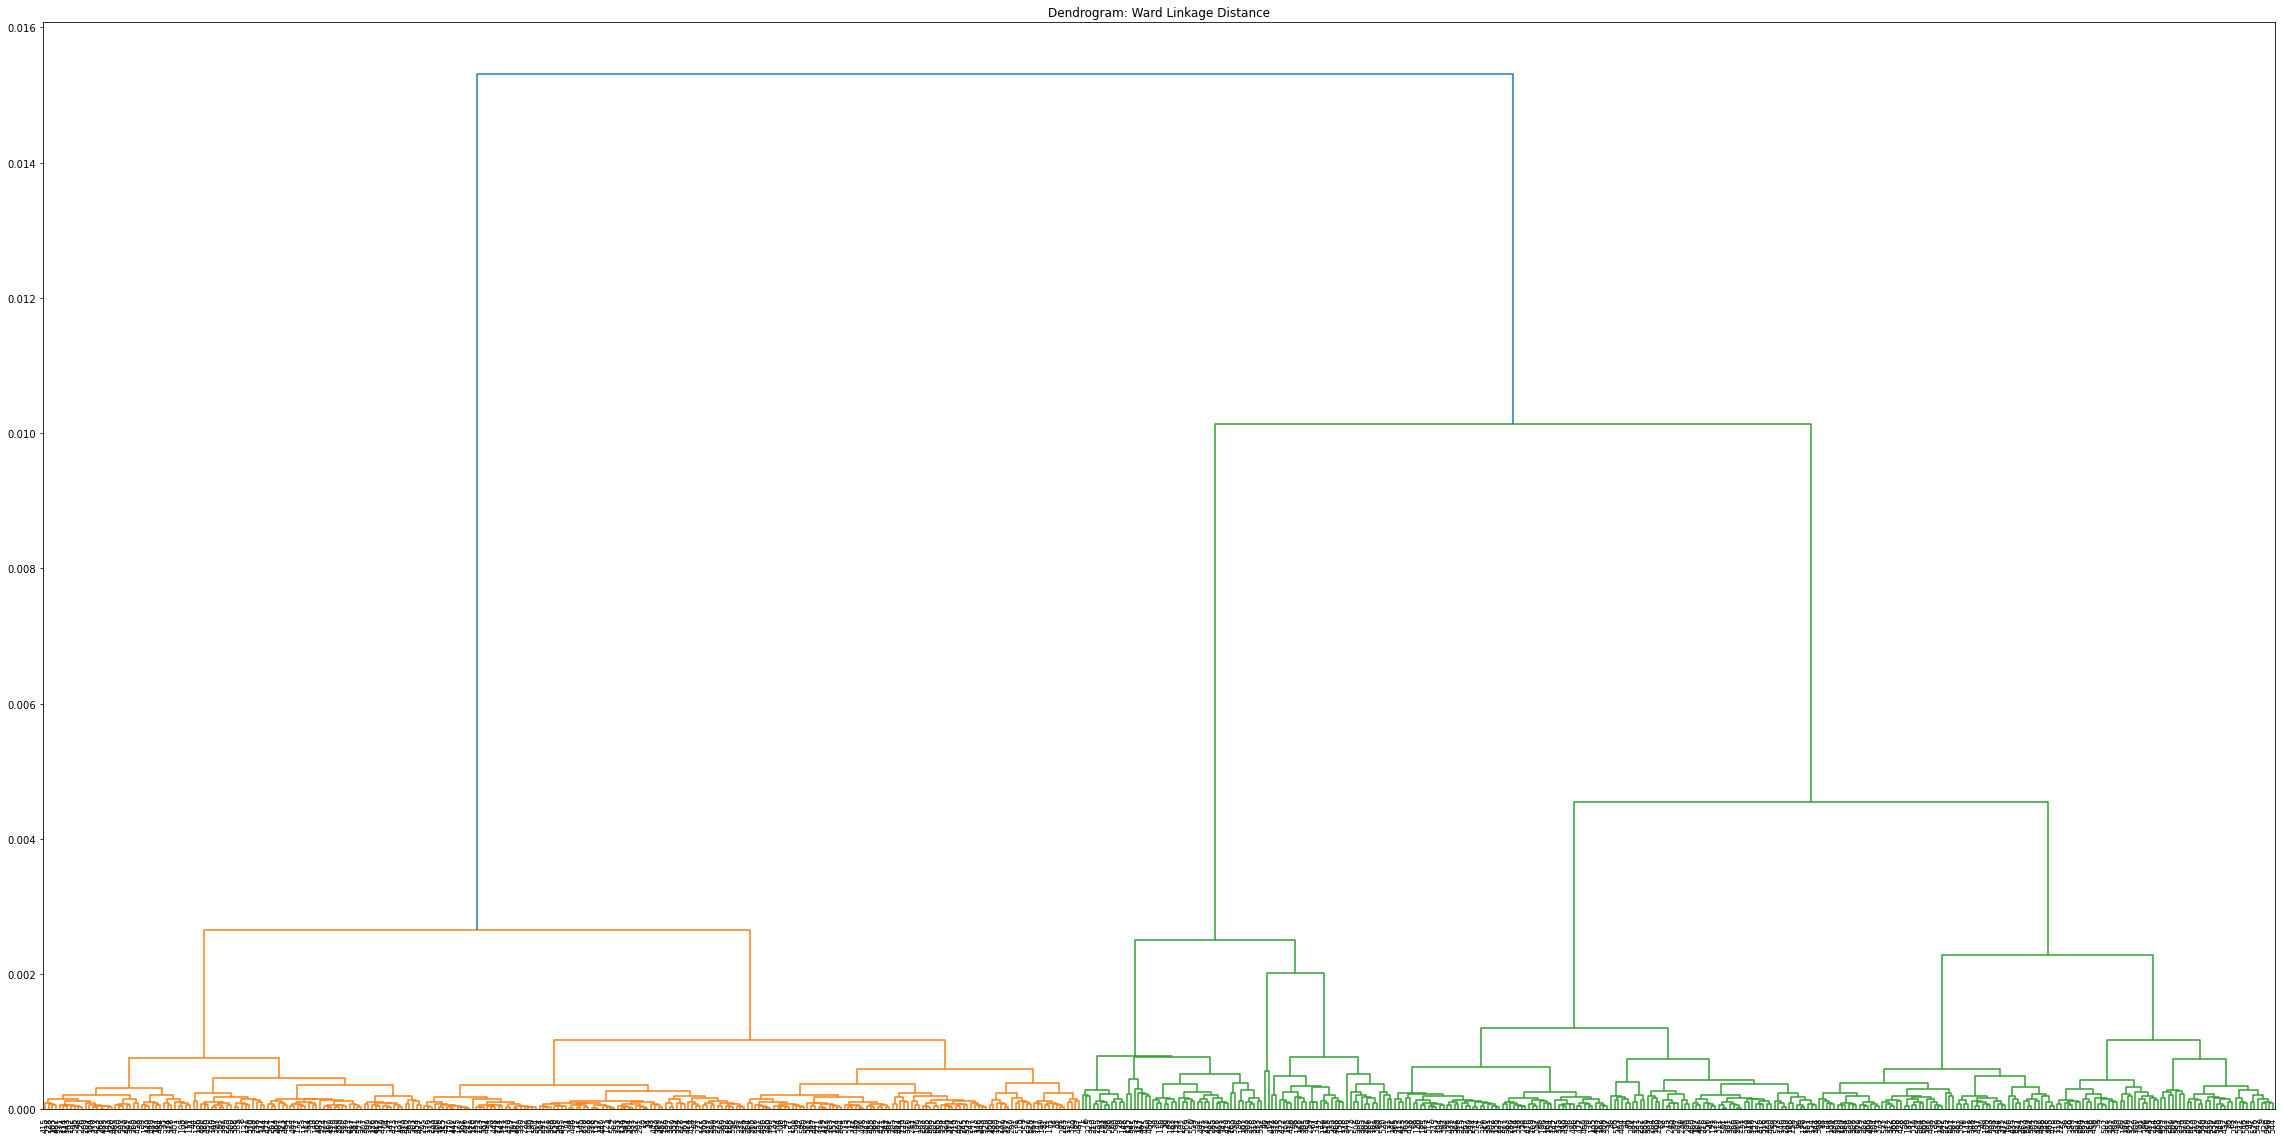

In [187]:
#ward linkage
clstr5 = hc.linkage(nbc, method='ward', metric="euclidean")
plt.figure(figsize=(40, 20))  
plt.title("Dendrogram: Ward Linkage Distance")
dgnbb5 = hc.dendrogram(clstr5, leaf_rotation=90., leaf_font_size=8.)

<h><b>3. Apply k-means clustering to the dataset. Try different values of k (4, 5, 6, 7, and 8 at least); make sure you
include the number of clusters you decided to used with hierarchical clustering. Are clear clusters visible for
any value of k? As before, how many clusters would you recommend, and why? What are some distinguishing
characteristics of each cluster? How different are these results from those with hierarchical clustering? Which
    seems preferable in this case? Explain.</b><h>

In [319]:
# k-means with 2 Clusters
clstr2 = km(n_clusters=2, random_state=0) 
clstr2.fit(nbc)

KMeans(n_clusters=2, random_state=0)


In [191]:
#cluster centers
clstr2.cluster_centers_

array([[2.43330381e-03, 3.39653653e-05, 9.99996946e-01, 4.14794237e-05,
        6.71707302e-05, 2.99276465e-05, 4.02252627e-05, 4.82877064e-05,
        2.31249596e-05, 2.37899662e-05, 3.17461070e-05, 2.06841914e-05,
        8.27724119e-06, 5.85380526e-06],
       [1.38562106e-03, 1.76853891e-05, 9.99999002e-01, 2.50040429e-05,
        3.70169626e-05, 1.81433671e-05, 2.53768348e-05, 2.92608318e-05,
        1.30843483e-05, 1.62578757e-05, 1.69322608e-05, 1.00372206e-05,
        6.22391377e-06, 4.05574037e-06]])

In [192]:
# assign cluster membership labels
clusters2 = clstr2.labels_
clusters2

array([0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0,

In [193]:
# add to the dataframe
nbc2 = nbc.copy()
nbc2['CLUSTER'] = clusters2.tolist()
nbc2

,age,sex,income,married,children,car,savings,checking,mortgage,pep,inner city,town,rural,suburban,CLUSTER
0,0.002736,0.000057,0.999996,0.000000,0.000057,0.000000,0.000000,0.000000,0.000000,0.000057,0.000057,0.000000,0.00000,0.0,0
1,0.001330,0.000000,0.999999,0.000033,0.000100,0.000033,0.000000,0.000033,0.000033,0.000000,0.000000,0.000033,0.00000,0.0,1
2,0.003077,0.000060,0.999995,0.000060,0.000000,0.000060,0.000060,0.000060,0.000000,0.000000,0.000060,0.000000,0.00000,0.0,0
3,0.001129,0.000049,0.999999,0.000049,0.000147,0.000000,0.000000,0.000049,0.000000,0.000000,0.000000,0.000049,0.00000,0.0,1
4,0.001127,0.000020,0.999999,0.000020,0.000000,0.000000,0.000020,0.000000,0.000000,0.000000,0.000000,0.000000,0.00002,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,0.001297,0.000021,0.999999,0.000000,0.000043,0.000021,0.000021,0.000021,0.000021,0.000000,0.000021,0.000000,0.00000,0.0,1
596,0.003102,0.000103,0.999995,0.000103,0.000000,0.000103,0.000103,0.000103,0.000000,0.000000,0.000103,0.000000,0.00000,0.0,0
597,0.001940,0.000063,0.999998,0.000063,0.000000,0.000063,0.000063,0.000000,0.000000,0.000063,0.000000,0.000063,0.00000,0.0,0
598,0.001971,0.000000,0.999998,0.000068,0.000000,0.000000,0.000068,0.000000,0.000068,0.000000,0.000068,0.000000,0.00000,0.0,0


In [194]:
# check cluster sizes
nbc2['CLUSTER'].value_counts()

1    418
0    182
Name: CLUSTER, dtype: int64

In [264]:
# get averages by cluster to see how the clusters are different
nbc2Avg = nbc2.groupby('CLUSTER', as_index=False).mean()
nbc2Avg

,CLUSTER,age,sex,income,married,children,car,savings,checking,mortgage,pep,inner city,town,rural,suburban
0,0,0.002433,0.000034,0.999997,0.000041,0.000067,0.000030,0.000040,0.000048,0.000023,0.000024,0.000032,0.000021,0.000008,0.000006
1,1,0.001386,0.000018,0.999999,0.000025,0.000037,0.000018,0.000025,0.000029,0.000013,0.000016,0.000017,0.000010,0.000006,0.000004


In [318]:
sns.scatterplot(x=clstr2, y=nbc2['income'], hue=nbc2['CLUSTER'], data = nbc2)
# sns.scatterplot(x=nbc2Avg.index, y=nbc2Avg['income'], hue=nbc2Avg['CLUSTER'], data = nbc2Avg)
plt.show()

ValueError: Length of ndarray vectors must match length of `data` when both are used, but `data` has length 600 and the vector passed to `x` has length 599.

In [266]:
# k-means with 3 Clusters
clstr3 = km(n_clusters=3, random_state=0) 
clstr3.fit(nbc)
print(clstr3.cluster_centers_)
clusters3 = clstr3.labels_
print(clusters3)
nbc3 = nbc.copy()
nbc3['CLUSTER'] = clusters3.tolist()
print(nbc3['CLUSTER'].value_counts())
nbc3Avg = nbc3.groupby('CLUSTER', as_index=False).mean()
nbc3Avg

[[2.70123816e-03 3.88049765e-05 9.99996288e-01 4.58003718e-05
  6.62768509e-05 3.04893852e-05 4.31672557e-05 5.31437487e-05
  2.25397630e-05 2.35022862e-05 3.70500112e-05 2.04255771e-05
  7.87949310e-06 7.14605512e-06]
 [1.25692065e-03 1.60586464e-05 9.99999194e-01 2.25785592e-05
  3.41329598e-05 1.67173758e-05 2.38881089e-05 2.62678283e-05
  1.17789148e-05 1.58287402e-05 1.48029209e-05 8.95077429e-06
  6.35030333e-06 3.40123218e-06]
 [1.87961634e-03 2.43834241e-05 9.99998204e-01 3.33655486e-05
  5.46378417e-05 2.50139084e-05 3.23040778e-05 3.93027358e-05
  1.96705716e-05 2.02217189e-05 2.35861303e-05 1.63382714e-05
  7.08488597e-06 5.14986252e-06]]
[0 1 0 1 1 1 0 0 1 2 1 2 0 1 2 2 2 1 0 1 1 0 1 2 2 1 2 2 1 0 0 1 2 1 1 1 2
 0 0 0 2 2 1 1 1 1 0 2 1 0 2 1 0 2 1 1 0 1 2 1 2 2 2 2 0 0 2 1 1 0 2 0 1 0
 1 2 2 1 2 2 2 1 0 2 0 1 2 0 2 2 1 1 1 1 1 2 0 1 0 1 2 0 0 1 2 1 1 2 2 1 1
 1 1 1 1 1 0 0 2 1 1 1 2 1 1 1 1 1 0 1 2 1 0 2 1 2 1 1 1 1 1 2 2 1 1 1 2 1
 0 1 2 1 1 1 2 0 2 1 0 0 1 0 0 0 2 1 2 0 1

,CLUSTER,age,sex,income,married,children,car,savings,checking,mortgage,pep,inner city,town,rural,suburban
0,0,0.002701,0.000039,0.999996,0.000046,0.000066,0.000030,0.000043,0.000053,0.000023,0.000024,0.000037,0.000020,0.000008,0.000007
1,1,0.001257,0.000016,0.999999,0.000023,0.000034,0.000017,0.000024,0.000026,0.000012,0.000016,0.000015,0.000009,0.000006,0.000003
2,2,0.001880,0.000024,0.999998,0.000033,0.000055,0.000025,0.000032,0.000039,0.000020,0.000020,0.000024,0.000016,0.000007,0.000005


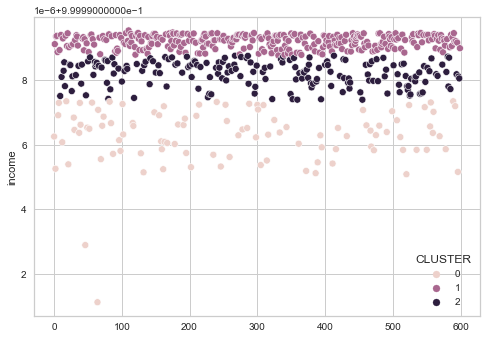

In [307]:
sns.scatterplot(x=nbc3.index, y=nbc3['income'], hue=nbc3['CLUSTER'], data = nbc3)
plt.show()

In [296]:
# k-means with 4 Clusters
clstr4 = km(n_clusters=4, random_state=0) 
clstr4.fit(nbc)
print(clstr4.cluster_centers_)
clusters4 = clstr4.labels_
print(clusters4)
nbc4 = nbc.copy()
nbc4['CLUSTER'] = clusters4.tolist()
print(nbc4['CLUSTER'].value_counts())
nbc4Avg = nbc4.groupby('CLUSTER', as_index=False).mean()
nbc4Avg

[[1.20348038e-03 1.48040826e-05 9.99999266e-01 2.08181539e-05
  3.25116788e-05 1.62841535e-05 2.30022167e-05 2.52937057e-05
  1.10243063e-05 1.68899260e-05 1.40700848e-05 8.67432391e-06
  5.96955489e-06 3.21229402e-06]
 [2.13355557e-03 3.14456133e-05 9.99997696e-01 4.11823291e-05
  6.62014440e-05 3.13337183e-05 4.09088799e-05 4.52425118e-05
  2.07907444e-05 2.33381739e-05 2.49365619e-05 1.92715926e-05
  8.94564262e-06 7.54208325e-06]
 [1.64913300e-03 2.15172802e-05 9.99998623e-01 3.11507632e-05
  4.34889363e-05 1.99820313e-05 2.88961752e-05 3.46735171e-05
  1.61815267e-05 1.48184475e-05 2.16675211e-05 1.24354430e-05
  6.20425056e-06 4.67901997e-06]
 [2.80946987e-03 3.75914630e-05 9.99996000e-01 4.14068433e-05
  6.74910250e-05 2.93494693e-05 3.86041136e-05 5.26327755e-05
  2.58092961e-05 2.49006920e-05 3.94050719e-05 2.13062130e-05
  8.07902384e-06 4.81510478e-06]]
[3 0 3 0 0 2 3 1 2 1 0 1 3 0 2 2 1 0 1 0 0 3 0 2 2 0 1 1 0 3 3 0 1 0 0 0 2
 3 1 3 1 2 0 0 2 0 3 1 0 3 2 2 3 2 0 0 1 0 1 0 2

,CLUSTER,age,sex,income,married,children,car,savings,checking,mortgage,pep,inner city,town,rural,suburban
0,0,0.001203,0.000015,0.999999,0.000021,0.000033,0.000016,0.000023,0.000025,0.000011,0.000017,0.000014,0.000009,0.000006,0.000003
1,1,0.002134,0.000031,0.999998,0.000041,0.000066,0.000031,0.000041,0.000045,0.000021,0.000023,0.000025,0.000019,0.000009,0.000008
2,2,0.001649,0.000022,0.999999,0.000031,0.000043,0.000020,0.000029,0.000035,0.000016,0.000015,0.000022,0.000012,0.000006,0.000005
3,3,0.002809,0.000038,0.999996,0.000041,0.000067,0.000029,0.000039,0.000053,0.000026,0.000025,0.000039,0.000021,0.000008,0.000005


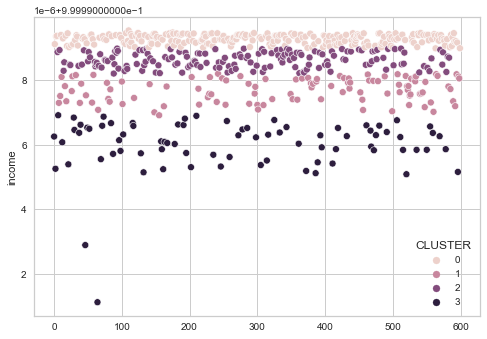

In [309]:
sns.scatterplot(x=nbc4.index, y=nbc4['income'], hue=nbc4['CLUSTER'], data = nbc2)
plt.show()

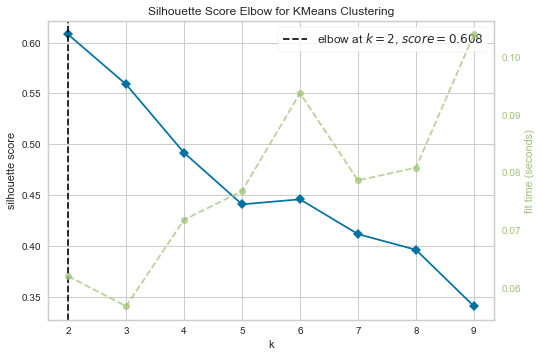

<AxesSubplot:title={'center':'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [290]:
# Silhouette Score for K means
# Import ElbowVisualizer
from yellowbrick.cluster import KElbowVisualizer
model = km()
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(2,10),metric='silhouette', timings= True)
visualizer.fit(nbc)        # Fit the data to the visualizer
visualizer.show()   

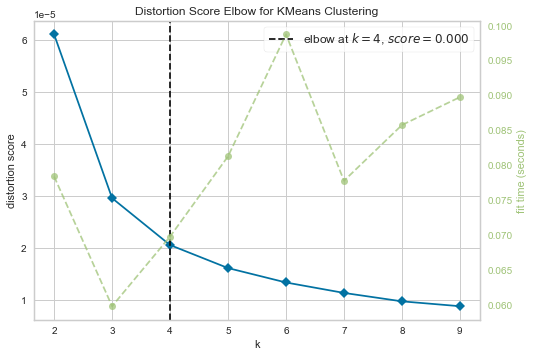

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [293]:
# Elbow Method for K means
# Import ElbowVisualizer
from yellowbrick.cluster import KElbowVisualizer
model = km()
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(2,10), timings= True)
visualizer.fit(nbc)        # Fit data to visualizer
visualizer.show()

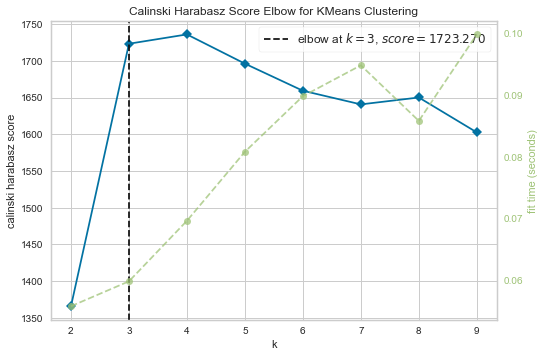

<AxesSubplot:title={'center':'Calinski Harabasz Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [295]:
# Calinski Harabasz Score for K means
# Import ElbowVisualizer
from yellowbrick.cluster import KElbowVisualizer
model = km()
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(2,10),metric='calinski_harabasz', timings= True)
visualizer.fit(nbc)        # Fit the data to the visualizer
visualizer.show()